# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df_main = pd.read_csv("Kesejahteraan Pekerja Indonesia(Clustered).csv")
df_main.head()

,Upah Minimum Provinsi,Pengeluaran,Upah_Rata_rata,Cluster
0,1900000.0,395136.0,11226.0,2
1,1900000.0,395136.0,11226.0,2
2,1900000.0,415354.0,11226.0,2
3,1900000.0,415354.0,11226.0,2
4,1900000.0,466355.0,11226.0,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [22]:
# Memisahkan fitur dan target
X = df_main.drop(columns=["Cluster"])
y = df_main["Cluster"]

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data hasil split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3718, 3), (930, 3), (3718,), (930,))

Data training memiliki 3718 sampel dan test set memiliki 930 sample

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Tahap 1: Training (Melatih setiap model)
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model  # Simpan model yang sudah dilatih

Proses training tergolong cepat untuk keempat model tersebut Sehingga masih belum dapat bisa menentukan model mana yang lebih baik digunakan untuk digunakan. Akan lebih baik apabila kita mengevaluasi hasil dari model tersebut pada tahap selanjutnya.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [15]:
# Tahap 2: Evaluation (Evaluasi setiap model)
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)  # Prediksi dengan model yang telah dilatih
    
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")  # Weighted karena data bisa tidak seimbang
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    
    # Simpan hasil evaluasi
    results[name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall
    }

# Menampilkan hasil evaluasi
results

{'Logistic Regression': {'Accuracy': 0.9795698924731183,
  'F1-Score': 0.9795748302902934,
  'Precision': 0.9797064955649519,
  'Recall': 0.9795698924731183},
 'Decision Tree': {'Accuracy': 0.9935483870967742,
  'F1-Score': 0.9935490714711617,
  'Precision': 0.9935957818655767,
  'Recall': 0.9935483870967742},
 'Random Forest': {'Accuracy': 0.989247311827957,
  'F1-Score': 0.989242894621369,
  'Precision': 0.9892793001466829,
  'Recall': 0.989247311827957},
 'K-Nearest Neighbors': {'Accuracy': 0.9086021505376344,
  'F1-Score': 0.9080570723331374,
  'Precision': 0.9089212525087728,
  'Recall': 0.9086021505376344}}

Hasil model paling bagus ada pada Decision Tree dari semua model yang tersedia, maka kedepannya kita akan menggunakan Decision Tree karena secara evaluasi matrix Accuracy hingga Recall memberikan hasil yang tinggi

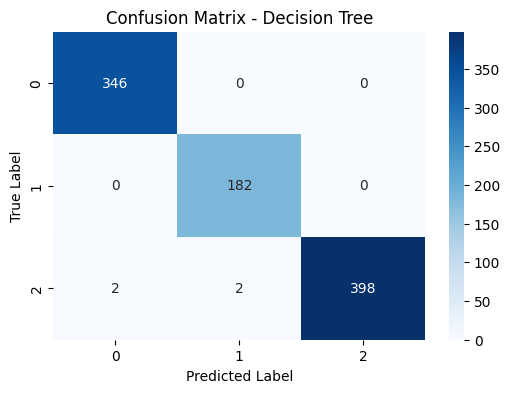

In [24]:
# Prediksi menggunakan model terbaik (Decision Tree)
best_model = models["Decision Tree"]
y_pred_dt = best_model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [26]:
# Hyperparameter tuning untuk Decision Tree
param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Menggunakan GridSearch untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik setelah tuning
best_dt = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


Diketahui ternyata hyperparameter paling baik ada pada `max_depth`: 20, `min_samples_leaf`: 1, `min_samples_split`: 2

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [27]:
# Evaluasi ulang model setelah tuning
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average="weighted")
precision = precision_score(y_test, y_pred_best, average="weighted")
recall = recall_score(y_test, y_pred_best, average="weighted")

# Menampilkan hasil tuning dan evaluasi ulang
best_params, {"Accuracy": accuracy_best, "F1-Score": f1_best, "Precisioin": precision, "Recall":recall}

({'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2},
 {'Accuracy': 0.9956989247311828,
  'F1-Score': 0.9956971465862954,
  'Precisioin': 0.9957346595519445,
  'Recall': 0.9956989247311828})

📌 Classification Report for best_dt

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       346
           1       0.99      1.00      0.99       182
           2       1.00      0.99      0.99       402

    accuracy                           1.00       930
   macro avg       0.99      1.00      1.00       930
weighted avg       1.00      1.00      1.00       930



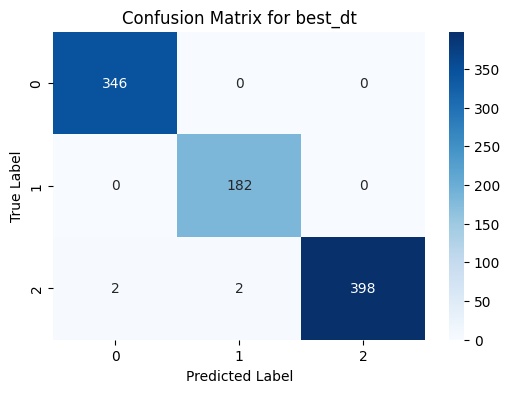

In [30]:
from sklearn.metrics import classification_report
# Prediksi menggunakan model best_dt
y_pred = best_dt.predict(X_test)

# Classification Report
print("📌 Classification Report for best_dt\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for best_dt")
plt.show()

In [ ]:
train_acc = best_dt.score(X_train, y_train)
test_acc = best_dt.score(X_test, y_test)

print("📌 Overfitting vs Underfitting Analysis for best_dt")
print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy: {test_acc:.4f}")

if train_acc > test_acc + 0.10:  # Jika akurasi train jauh lebih tinggi
    print("Model mengalami OVERFITTING! Coba lakukan pruning atau regularisasi.")
elif train_acc < 0.70 and test_acc < 0.70:  # Jika akurasi sangat rendah
    print("Model mengalami UNDERFITTING! Coba gunakan model lebih kompleks atau tambah fitur.")
else:
    print("✅ Model memiliki generalisasi yang baik.")

📌 Overfitting vs Underfitting Analysis for best_dt
✅ Train Accuracy: 1.0000
✅ Test Accuracy: 0.9957
✅ Model memiliki generalisasi yang baik.


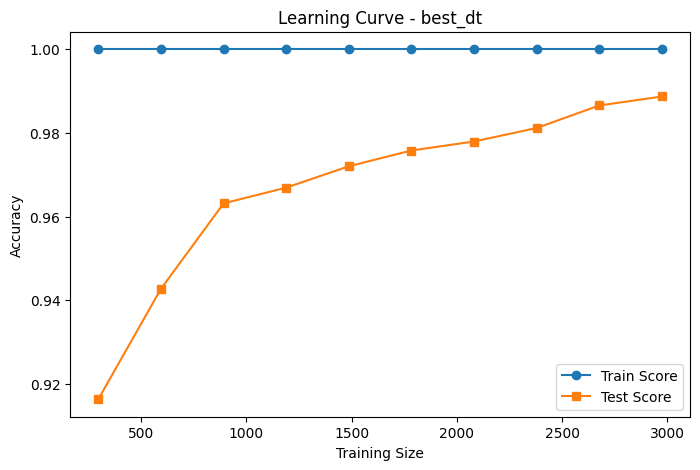

In [33]:
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, label="Train Score", marker="o")
    plt.plot(train_sizes, test_mean, label="Test Score", marker="s")
    
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Learning Curve untuk best_dt
plot_learning_curve(best_dt, X_train, y_train, "Learning Curve - best_dt")

Ternyata hasil model terlihat overfitting. Kenyataan bahwa model memiliki output yang sempurna pada data training menyebabkan model terlalu menyesuaikan dengan data training. Mari kita coba parameter lain yang lebih tergeneralisasi

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy")
new_estimators = grid_search.fit(X_train, y_train)

print("Best Parameters:", new_estimators.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


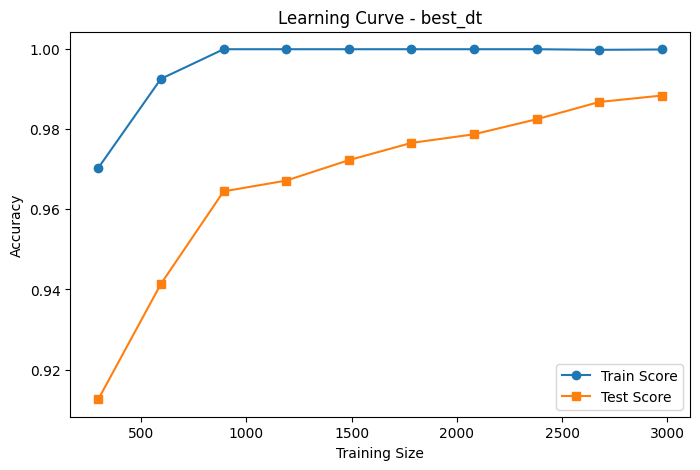

In [37]:
plot_learning_curve(new_estimators, X_train, y_train, "Learning Curve - best_dt")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Sebelum tuning, model dengan algoritma decision tree menghasilkan <br>
`Accuracy`: 0.9935483870967742, <br>
`F1-Score`: 0.9935490714711617, <br>
`Precision`: 0.9935957818655767, dan <br>
`Recall`: 0.9935483870967742. <br>
Akan tetapi, setelah melewati proses tuning dan mendapati hyperparameter terbaik dengan :<br>
`max_depth`: 20, `min_samples_leaf`: 1, `min_samples_split`: 2, <br>
maka hasilnya menjadi: <br>
`Accuracy`: 0.9956989247311828, <br>
`F1-Score`: 0.9956971465862954, <br>
`Precisioin`: 0.9957346595519445,<br>
`Recall`: 0.9956989247311828.
2. Identifikasi kelemahan model, seperti:
  - Ternyata parameter model awal mengalami overfitting, sehingga ketika diuji pada data training menghasilkan prediksi nilai yang selalu 1
  - Ketika dilakukan tuning lagi, ternyata model sudah membaik, cenderung general, meskipun  masih memiliki gapantara Learning Curve Train Score dan Test Score, tetapi setidaknya sudah lebih sempit dibandingkan model sebelumnya
3. Rekomendasi untuk tindakan lanjutan adalah coba mencari parameter lain dengan metode RandomizeSearchCV atau mengganti dengan Algoritma train Random Forest.